In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Question 1

In [2]:
def projectile_simulation(radius, rho, c, m, v, angle, g, dt, y, drag_force=True, v_wind=0):
    """
    A function to simulate the projectile trajectory based on the given initial conditions
    """
    
    A = np.pi*radius**2 # the surface area  
    
    if drag_force:
        k = c*rho*A # the drag force constats
    else:
        k=0
        
    angle = np.radians(angle) # the projection angle
    x_dot_i = v*np.cos(angle) # the velocity in the x direction
    y_dot_i = v*np.sin(angle) # the velocity in the y direction
    x_dots = [x_dot_i] # A list to store x-velocities over time
    y_dots = [y_dot_i] # A list to store y-velocities over time

    dts = [0] # store time
    xs = [0] # store the x-path
    ys = [y] # store the y-path. I start with a y value slightly larger than 0 for the while loop below to work

    i = 0 # index counter
    while y>0: # keep the simulation running until the projectile hits the floor

        # keeping track of the time with a time step of dt
        new_dt =dts[-1]+dt
        dts.append(new_dt)

        # decreasing the velocity in the x-direction by the drag and the wind:
        x_dot_n = x_dots[i]-(k/m)*x_dots[i]*dt - v_wind*dt

        # updating the x coordinate
        x = xs[i] + x_dot_n*dt

        xs.append(x)
        x_dots.append(x_dot_n)


        # decreasing the velocity in the y-direction using the gravity and the drag force
        y_dot_n = y_dots[i]- (g +(k/m)*y_dots[i])*dt

        y = ys[i] + y_dot_n*dt
        ys.append(y)
        y_dots.append(y_dot_n)

        i+=1
    return xs, ys, x_dots, y_dots, dts

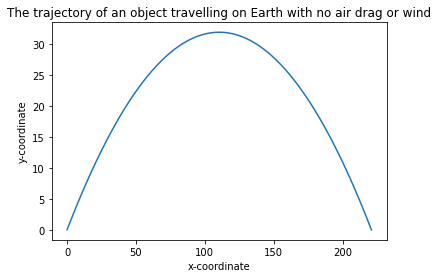

In [3]:
xs, ys, x_dots, y_dots, dts = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=False,v_wind=0)
plt.plot(xs, ys)
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("The trajectory of an object travelling on Earth with no air drag or wind")
plt.show()

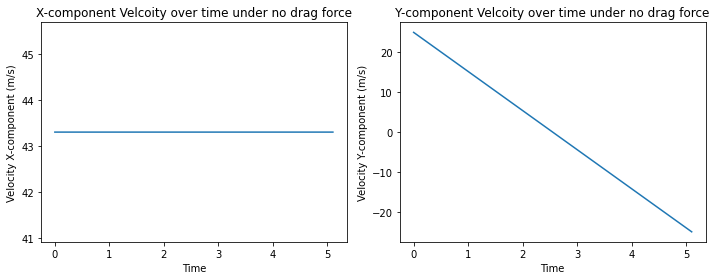

In [4]:
plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(dts, x_dots)
plt.xlabel("Time")
plt.ylabel("Velocity X-component (m/s)")
plt.title("X-component Velcoity over time under no drag force")

plt.subplot(1, 2, 2)
plt.plot(dts, y_dots)
plt.xlabel("Time")
plt.ylabel("Velocity Y-component (m/s)")
plt.title("Y-component Velcoity over time under no drag force")


plt.tight_layout()
plt.show()

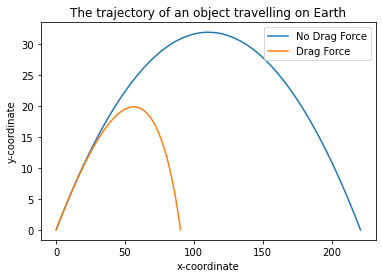

In [5]:
xs_drag, ys_drag, x_dots_drag, y_dots_drag, dts_drag = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=True,v_wind=0)

plt.plot(xs, ys, label = "No Drag Force")
plt.plot(xs_drag, ys_drag, label = "Drag Force")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("The trajectory of an object travelling on Earth")
plt.legend()
plt.show()

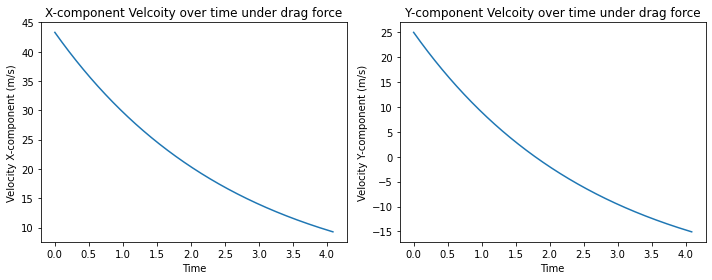

In [6]:
plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(dts_drag, x_dots_drag)
plt.xlabel("Time")
plt.ylabel("Velocity X-component (m/s)")
plt.title("X-component Velcoity over time under drag force")

plt.subplot(1, 2, 2)
plt.plot(dts_drag, y_dots_drag)
plt.xlabel("Time")
plt.ylabel("Velocity Y-component (m/s)")
plt.title("Y-component Velcoity over time under drag force")


plt.tight_layout()
plt.show()

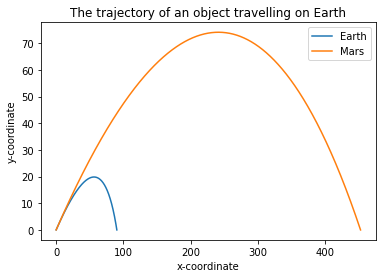

In [7]:
xs_mars, ys_mars, x_dots_mars, y_dots_mars, dts_mars = projectile_simulation(radius=1, rho=0.1, c=0.5, m=5, v=50, angle=30,
                                                   g=3.7, dt=0.001, y=0.0001, drag_force=True,v_wind=0)

xs_earth, ys_earth, x_dots_earth, y_dots_earth, dts_earth = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=True,v_wind=0)

plt.plot(xs_earth, ys_earth, label = "Earth")
plt.plot(xs_mars, ys_mars, label = "Mars")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("The trajectory of an object travelling on Earth")
plt.legend()
plt.show()

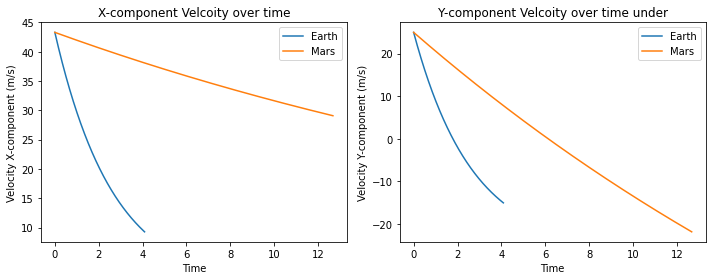

In [8]:
plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(dts_earth, x_dots_earth, label = "Earth")
plt.plot(dts_mars, x_dots_mars, label = "Mars")
plt.xlabel("Time")
plt.ylabel("Velocity X-component (m/s)")
plt.title("X-component Velcoity over time")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(dts_drag, y_dots_earth, label = "Earth")
plt.plot(dts_mars, y_dots_mars, label = "Mars")
plt.xlabel("Time")
plt.ylabel("Velocity Y-component (m/s)")
plt.title("Y-component Velcoity over time under")


plt.tight_layout()
plt.legend()
plt.show()

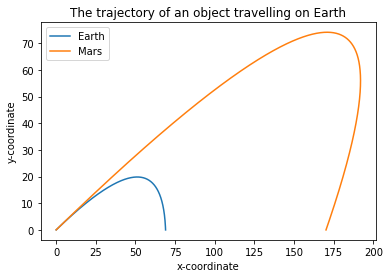

In [9]:
xs_mars, ys_mars, x_dots_mars, y_dots_mars, dts_mars = projectile_simulation(radius=1, rho=0.1, c=0.5, m=5, v=50, angle=30,
                                                   g=3.7, dt=0.001, y=0.0001, drag_force=True,v_wind=4)

xs_earth, ys_earth, x_dots_earth, y_dots_earth, dts_earth = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=True,v_wind=4)

plt.plot(xs_earth, ys_earth, label = "Earth")
plt.plot(xs_mars, ys_mars, label = "Mars")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("The trajectory of an object travelling on Earth")
plt.legend()
plt.show()

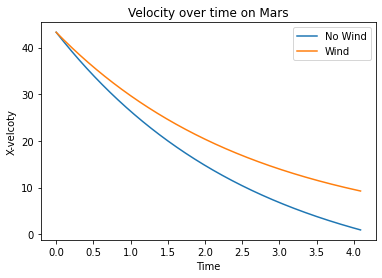

In [10]:
xs_earth_wind, ys_earth_wind, x_dots_earth_wind, y_dots_earth_wind, dts_earth_wind = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=True,v_wind=4)

xs_earth_nwind, ys_earth_nwind, x_dots_earth_nwind, y_dots_earth_nwind, dts_earth_nwind = projectile_simulation(radius=1, rho=1.2, c=0.5, m=5, v=50, angle=30,
                                                   g=9.8, dt=0.001, y=0.0001, drag_force=True,v_wind=0)

plt.plot(dts_earth_wind, x_dots_earth_wind, label = "No Wind")
plt.plot(dts_earth_nwind, x_dots_earth_nwind, label = "Wind")
plt.title("Velocity over time on Mars")
plt.legend()
plt.xlabel("Time")
plt.ylabel("X-velcoty")
plt.show()

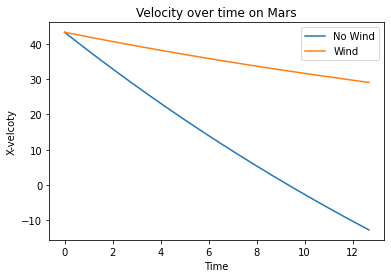

In [11]:
xs_mars_wind, ys_mars_wind, x_dots_mars_wind, y_dots_mars_wind, dts_mars_wind = projectile_simulation(radius=1, rho=0.1, c=0.5, m=5, v=50, angle=30,
                                                   g=3.7, dt=0.001, y=0.0001, drag_force=True,v_wind=4)

xs_mars_nwind, ys_mars_nwind, x_dots_mars_nwind, y_dots_mars_nwind, dts_mars_nwind = projectile_simulation(radius=1, rho=0.1, c=0.5, m=5, v=50, angle=30,
                                                   g=3.7, dt=0.001, y=0.0001, drag_force=True,v_wind=0)

plt.plot(dts_mars_wind, x_dots_mars_wind, label = "No Wind")
plt.plot(dts_mars_nwind, x_dots_mars_nwind, label = "Wind")
plt.title("Velocity over time on Mars")
plt.legend()
plt.xlabel("Time")
plt.ylabel("X-velcoty")
plt.show()

# Question 2

In [12]:
# buidling the phase space of the pairs
angles_space = np.linspace(0, 90, 90) # angle range between 0 and 90
speed_space = np.linspace(0, 240, 240) # velocty range between 0 and 240
phase_space = []

# make all possible pairs:
for speed in speed_space:
    for angle in angles_space:
        phase_space.append([speed, angle])

In [13]:
def get_distance(proposal_v, proposal_theta, wind_constant):
    """
    A function that uses the simulation to get the distance that can be 
    reached using the given velocity, angle, and wind condition
    """
    
    # using the paramtesr obtained from Wikipedia specific for the Harpoon missile:
    xs, ys, x_dots, y_dots, dts = projectile_simulation(radius = 0.34, rho=1.2, c=0.295, m=691, v=proposal_v, 
                                    angle=proposal_theta, g=9.8, dt=0.001, y=0.0001, drag_force=True, v_wind=wind_constant)
    
    return xs[-1]

In [14]:
# maximum distance that the max speed can achieve:
get_distance(proposal_v=240, proposal_theta=50, wind_constant=0.1)

5691.215529377077

In [15]:
def get_sample(target, wind_constant, sample_size):
    """
    The MCMC method in which the proposal distribution is a random distribution over the phase space
    The proposed pair is accepted if it achieves a distance within 0.5km of the target.
    
    """
    sample = []
    # the algorithm will run until the indicated sample size is provided
    while len(sample) < sample_size:
        proposal_speed, proposal_angle = random.choice(phase_space)
        if abs(target - get_distance(proposal_speed, proposal_angle, wind_constant))/1000 < 0.5:
            sample.append([proposal_speed, proposal_angle])
    return sample

Testing the algorithm by asking for a target distance of 2km. We should get velocities and angles that can be within 1500m and 2500m

In [16]:
### ****Note****: the target distance can't more than 5000 meters. To reach larger distances, the maxmimum speed
#has to be increased (not very realistic since that will make it go above the speed of sound). Or more realsicly
# add a thrust force to the missile.
target = 4000
sample = get_sample(target=target, wind_constant=0.1, sample_size=10)

In [17]:
#print the speed that can be reached with that pair
for v, theta in sample:
    print(f"The pair {(round(v), round(theta))} reaches a distance : {round(get_distance(v, theta, wind_constant=0.1))} meters")

The pair (228, 25) reaches a distance : 4065 meters
The pair (213, 26) reaches a distance : 3646 meters
The pair (190, 42) reaches a distance : 3615 meters
The pair (188, 47) reaches a distance : 3542 meters
The pair (223, 25) reaches a distance : 3888 meters
The pair (221, 57) reaches a distance : 4484 meters
The pair (197, 39) reaches a distance : 3834 meters
The pair (191, 38) reaches a distance : 3577 meters
The pair (205, 47) reaches a distance : 4214 meters
The pair (210, 43) reaches a distance : 4429 meters


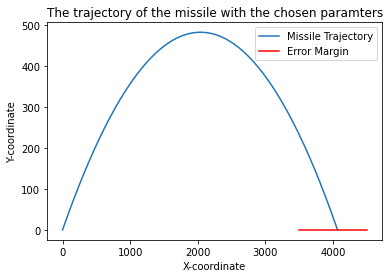

In [18]:
# from the list above, we can choose any pair
v, theta = sample[0]
xs, ys, x_dots, y_dots, dts = projectile_simulation(radius = 0.34, rho=1.2, c=0.295, m=691, v=v, 
                                    angle=theta, g=9.8, dt=0.001, y=0.0001, drag_force=True, v_wind=0.1)
plt.plot(xs, ys, label = "Missile Trajectory")
plt.plot(range(target-500, target+500), [0 for i in range(1500, 2500)], color= 'red', label = "Error Margin")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("The trajectory of the missile with the chosen paramters")
plt.legend()
plt.show()